In [1]:
import Diagrams.Backend.Cairo.CmdLine

In [2]:
{-# LANGUAGE NoMonomorphismRestriction #-}
{-# LANGUAGE MultiParamTypeClasses #-}
{-# LANGUAGE FlexibleContexts #-}
{-# LANGUAGE TypeFamilies #-}

import Diagrams.Prelude
import Data.Colour.Palette.BrewerSet

This code demonstrates the circle-packing layout from the `diagrams-contrib`
package. For more information on the algorithm used, see the [`circle-packing`
package](http://hackage.haskell.org/package/circle%2Dpacking).



In [3]:
import Diagrams.TwoD.Layout.CirclePacking

Lets collect some objects of varying size and color to draw. They do not need
to be single shapes but can be arbitrary complex diagrams, as demonstrated by
including some Spierpinsky triangles among them.



In [4]:
colorize = zipWith fc $ cycle (brewerSet Dark2 8)

sierpinski :: Int -> Diagram B
sierpinski 1 = eqTriangle 1
sierpinski n = (s === (s ||| s) # centerX) # alignY (-1/3)
  where s = sierpinski (n-1)


In [5]:
objects :: [Diagram B]
objects = lw thin . colorize $
    scale 0.04 (sierpinski 7) :
    scale 0.03 (sierpinski 7) :
    [ circle r  | r <- [0.1,0.2..1.6] ] ++
    [ hexagon r | r <- [0.1,0.2..0.7] ] ++
    [ decagon r | r <- [0.1,0.2..0.7] ]


And now we can leave the layouting to `diagrams-contrib`:



In [6]:
example = renderCirclePacking (approxRadius 6) objects

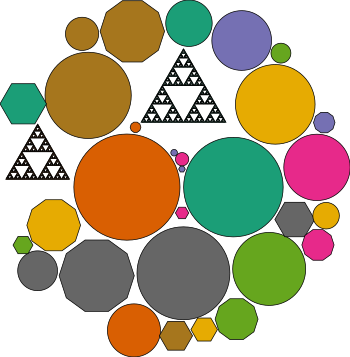

In [7]:
example